In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../dataset/preprocessed.csv')
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes Sent,Bytes Received,Elapsed Time (sec)
0,57222,53,54587,53,allow,94,83,30
1,56258,3389,56258,3389,allow,1600,3168,17
2,6881,50321,43265,50321,allow,118,120,1199
3,50553,3389,50553,3389,allow,1438,1889,17
4,50002,443,45848,443,allow,6778,18580,16


In [3]:
data.drop(['Action'], axis=1, inplace=True)
feature_names = data.columns
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes Sent,Bytes Received,Elapsed Time (sec)
0,57222,53,54587,53,94,83,30
1,56258,3389,56258,3389,1600,3168,17
2,6881,50321,43265,50321,118,120,1199
3,50553,3389,50553,3389,1438,1889,17
4,50002,443,45848,443,6778,18580,16


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(data)

PCA(n_components=3)

In [6]:
pca_names = [f'PCA_{i}' for i in range(pca.n_components_)]

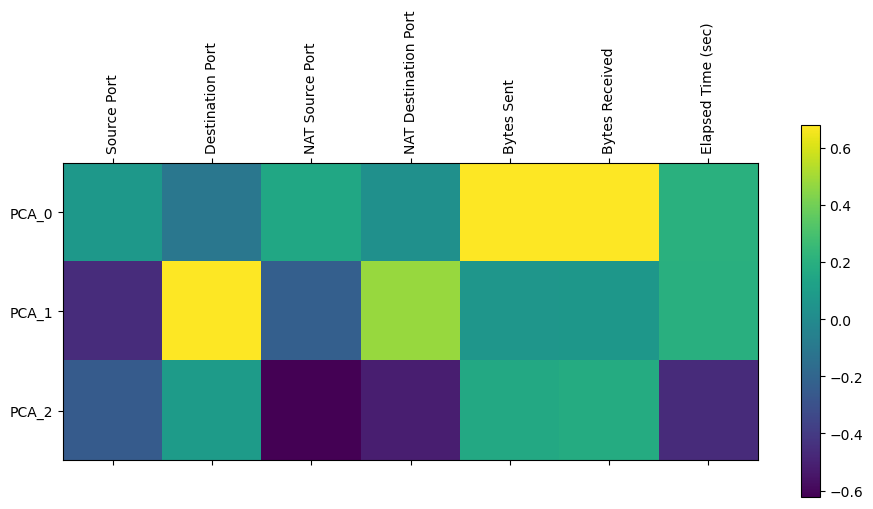

In [7]:
plt.matshow(pca.components_)
plt.xticks(ticks=range(pca.components_.shape[1]),
           labels=feature_names,
           rotation='vertical')
plt.yticks(ticks=range(pca.n_components_),
           labels=pca_names)
plt.colorbar()
plt.show()

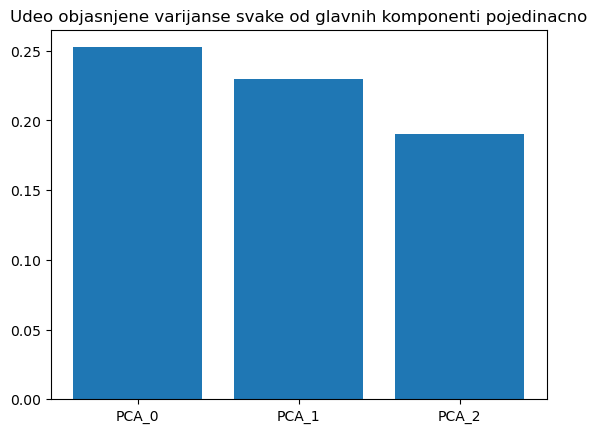

In [8]:
plt.bar(x=pca_names,
        height=pca.explained_variance_ratio_)
plt.title('Udeo objasnjene varijanse svake od glavnih komponenti pojedinacno')
plt.show()

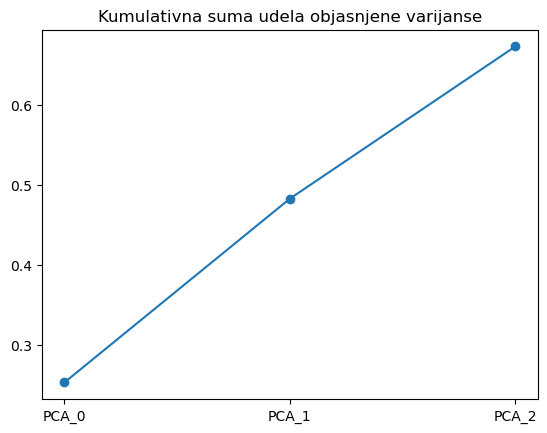

[0.25250602 0.48260537 0.67319707]


In [12]:
import numpy as np
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(pca_names, cumulative_variance_ratio, marker='o')
plt.title('Kumulativna suma udela objasnjene varijanse')
plt.show()
print(cumulative_variance_ratio)

In [19]:
data_pca = pca.fit_transform(data)
data_pca

array([[ 0.25140139, -1.14770633, -1.00411394],
       [ 0.26260113, -0.85616821, -1.17088875],
       [ 0.58870104,  5.58143899, -4.07732843],
       ...,
       [-0.165372  , -0.51668473,  0.63596295],
       [-0.1653767 , -0.51665474,  0.63597943],
       [-0.16539079, -0.5165648 ,  0.63602888]])

In [21]:
pd.DataFrame(data_pca, columns=['Component 1', 'Component 2', 'Component 3']).to_csv('../dataset/pca.csv')